In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
req_features = ["NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y", "beamEnergy", "particle" ]

In [3]:
data = pd.read_pickle("/home/nitish/Documents/Project_sep_2020/Data/Notebooks_Plots/new_combined_data_for_DT.pkl")
data

,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,trueBeamEnergy,particle
877301,891,19975.788540,18.506620,0.000926,2.536491,2.631042,200.0,197.320007,positron
838258,976,20638.333755,7.480501,0.000362,2.525404,2.569785,200.0,197.320007,positron
68595,140,850.470873,71.280923,0.083813,3.070626,2.235369,20.0,19.950222,pion
913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,287.179993,positron
913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,287.179993,positron
...,...,...,...,...,...,...,...,...,...
881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,197.320007,positron
418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,301.545776,pion
583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,20.000000,positron
12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,20.054062,pion


In [33]:
features = data[req_features]
features

,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
877301,891,19975.788540,18.506620,0.000926,2.536491,2.631042,200.0,positron
838258,976,20638.333755,7.480501,0.000362,2.525404,2.569785,200.0,positron
68595,140,850.470873,71.280923,0.083813,3.070626,2.235369,20.0,pion
913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,positron
913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,positron
...,...,...,...,...,...,...,...,...
881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,positron
418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,pion
583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,positron
12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,pion


In [34]:
features.loc[features.rechit_energy_Hcal_by_Ecal>1000000]
features.drop(list(features.loc[features.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)
features.reset_index(inplace=True)
features

/home/nitish/.local/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
0,877301,891,19975.788540,18.506620,0.000926,2.536491,2.631042,200.0,positron
1,838258,976,20638.333755,7.480501,0.000362,2.525404,2.569785,200.0,positron
2,68595,140,850.470873,71.280923,0.083813,3.070626,2.235369,20.0,pion
3,913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,positron
4,913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,positron
...,...,...,...,...,...,...,...,...,...
967178,881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,positron
967179,418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,pion
967180,583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,positron
967181,12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,pion


In [35]:
features.isin([np.inf]).sum()

index                         0
NRechits                      0
rechit_energy_Ecal            0
rechit_energy_Hcal            0
rechit_energy_Hcal_by_Ecal    0
std_x                         0
std_y                         0
beamEnergy                    0
particle                      0
dtype: int64

In [36]:
train_size = 967183*0.5
test_size = 967183*0.25

train_data = features.loc[:train_size,:]
dev_data = features.loc[train_size:(train_size+test_size),:]
test_data = features.loc[(train_size+test_size):,:]

In [114]:
features_list = [ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]


X_train = train_data[features_list].values
y_train = train_data.particle.values

X_dev = dev_data[features_list].values
y_dev = dev_data.particle.values

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Text(0.5, 1.0, 'Correlation between Features')

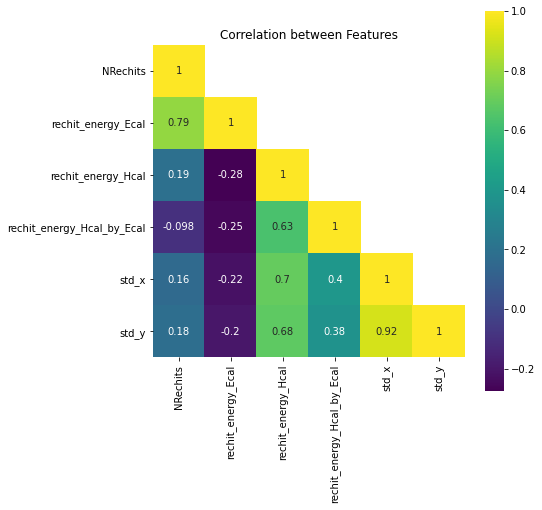

In [116]:
mask = np.tril(np.ones([6,6]))==0

plt.figure(figsize=[7,7])
sns.heatmap(data[data.columns[:-3]].corr(), annot=True, square=True, cmap="viridis", mask=mask)
plt.title("Correlation between Features")

[[0.65351371 0.         0.         0.         0.         0.        ]
 [0.96659581 0.86394316 0.         0.         0.         0.        ]
 [0.97123195 0.9858269  0.92579695 0.         0.         0.        ]
 [0.97847773 0.98540092 0.98080613 0.97817582 0.         0.        ]
 [0.96681914 0.98012374 0.95432927 0.97944962 0.92228159 0.        ]
 [0.96413506 0.98004516 0.95387848 0.9791229  0.94474681 0.91852223]]


Text(0.5, 1.0, 'Model Performance')

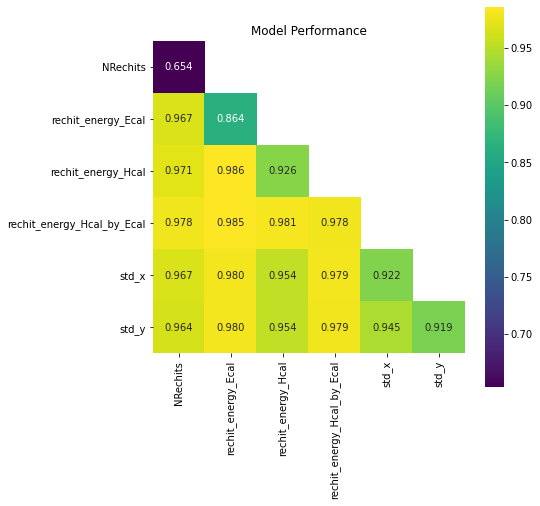

In [161]:
max_depth = 5
model_acc_scores = np.zeros([6,6])

model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=10, min_samples_split=20)

for i in range(6):
    
    yhat = model_DT.fit(X_train[:,i].reshape(-1, 1), y_train).predict(X_dev[:,i].reshape(-1, 1))
    model_acc_scores[i,i] = metrics.accuracy_score(y_dev,yhat)
    

for i in range(6):
    for n in range(6):
        if (i!=n) and (i<=n):
            x = np.c_[X_train[:,i], X_train[:,n]]
            x_dev = np.c_[X_dev[:,i], X_dev[:,n]]
            yhat = model_DT.fit(x, y_train).predict(x_dev)
            model_acc_scores[n,i] = metrics.accuracy_score(y_dev,yhat)
    
print(model_acc_scores)



mask = np.tril(np.ones([6,6]))==0
plt.figure(figsize=[7,7])
sns.heatmap(model_acc_scores, fmt=".3f", annot=True, square=True, cmap="viridis", mask=mask,  xticklabels=features_list, yticklabels=features_list)
plt.title("Model Performance")

[[1.         0.         0.         0.         0.         0.        ]
 [0.6122227  1.         0.         0.         0.         0.        ]
 [0.58754901 0.81450479 1.         0.         0.         0.        ]
 [0.65061457 0.86022515 0.93398154 1.         0.         0.        ]
 [0.58836788 0.82577876 0.91739317 0.92836523 1.         0.        ]
 [0.58537776 0.82196976 0.91335258 0.92460587 0.93067296 1.        ]]


Text(0.5, 1.0, 'Model Similarity')

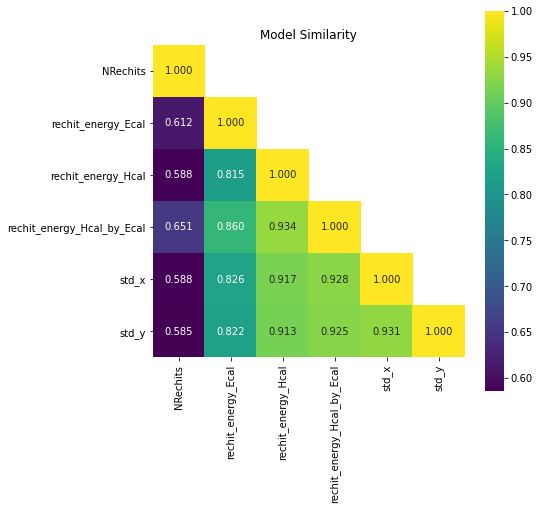

In [173]:
max_depth = 5
model_similarity = np.zeros([6,6])
n_dev = y_dev.size

model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=10, min_samples_split=20)
    

for i in range(6):
    for n in range(6):
        if (i<=n):
            
            xi_pred = model_DT.fit(X_train[:,i].reshape(-1, 1), y_train).predict(X_dev[:,i].reshape(-1, 1))
            xn_pred = model_DT.fit(X_train[:,n].reshape(-1, 1), y_train).predict(X_dev[:,n].reshape(-1, 1))
            
            model_similarity[n,i] = (xi_pred==xn_pred).sum()/n_dev

    
print(model_similarity)



mask = np.tril(np.ones([6,6]))==0
plt.figure(figsize=[7,7])
sns.heatmap(model_similarity, fmt=".3f", annot=True, square=True, cmap="viridis", mask=mask,  xticklabels=features_list, yticklabels=features_list)
plt.title("Model Similarity")

2

array(['positron', 'positron', 'positron', ..., 'positron', 'pion',
       'positron'], dtype=object)

In [145]:
for i in range(6):
    for n in range(6):
        if (i!=n) and (i<=n):
            print(i,n)

0 1
0 2
0 3
0 4
0 5
1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5
